# INTRODUCTION :


#### This Project focused on the Data Wrangling Process used in Data Analytics. Each step of the Wrangling Process (Gathering,Accessing and Cleaning) was applied to a dataset obtained from the tweet archive of Twitter user known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. After the data was wrangled, an Exploratory analysis was applied to the cleaned data and appropraite visualizations were generated for each analysis. The Project has been organized into seperate steps :

* Gathering of the data
* Assessing the data
* Cleaning the data
* Storing the data
* Exploratory Analysis
* Conclusions and Limitations

In [220]:
# Importing the neccesary libraries needed for the Project

import pandas as pd
import tweepy
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
import json
import re
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

## GATHERING THE DATA

In [108]:
# Reading the The WeRateDogs Twitter archive into the pandas dataframe
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [109]:
# Using the get requests to open the  tweet image predictions url
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

#saving the contents of the url to a file called image_predictions as a tsv file
open("image_prediction.tsv", "wb").write(response.content)


335079

In [110]:
#Loading the image_prediction tsv file into the pandas dataframe

image_prediction = pd.read_csv("image_prediction.tsv", sep ='\t')

image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [111]:
# Creating an empty list to store a lists of dictionaries.
df = list()

#reading the tweet_json text file line by line using a for loop. Each line read, is parsed using the json.loads method, 
#which converts the string into a dictionary. The values of in the dictionary are accessed keys such as 
#the retweet count, favorite counts and id.

with open('tweet-json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})

        
#converting the lists of dictionaries into a pandas dataframe.
add_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [112]:
add_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# ACCESSING THE DATA

####  VISUAL ASSESSMENTS OF ALL THE TABLES

In [113]:
#visually inspecting the twitter_archive dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [114]:
#visually inspecting the image_prediction dataframe
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [115]:
#visually inspecting the add_data dataframe
add_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### ASSESSING THE DATAFRAMES PROGRAMMATICALLY

In [116]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [117]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [118]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [119]:
#Checking the column headers of all the three (3) datasets for duplicate column labels
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(add_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [120]:
#Sampling the dataframe for five random rows and columns.
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,None,None,None,None
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None
484,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,None,None,None,None
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None


In [121]:
#Checking the dataframe for the total NaN values in each column.
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [122]:
#Checking for total number duplicates in the dataframe. This will check for whole rows with duplicate values.
sum(twitter_archive.duplicated())

0

In [123]:
#Checking the dataframe for a list of all the unique dog names. This will help us pick out names which are not valid  
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [124]:
#Checking the dataframe for the aggregate count values of all the dog names.
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [125]:
#checking the dataframe for invalid names such as  None,a,o. We can visually inspect the text columns which contain from which the names were extracted and verify 
twitter_archive.loc[twitter_archive["name"].str.contains("None|a|o", flags =re.I, regex = True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [126]:
#Checking for tweet_id duplicates
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [127]:
#Checking for expanded url duplicates
twitter_archive[twitter_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [128]:
#Checking for the total number of duplicates in the expanded url column.
sum(twitter_archive.expanded_urls.duplicated())

137

In [129]:
#Checking the distinct value counts of devices and applications used for tweeting in the source column 
twitter_archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [130]:
#Taking a look at the descriptive summary statistics of the numerical columns in the dataset. 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [131]:
#aggregating counts for each unique value in the rating_numerator column.

twitter_archive['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [132]:
#aggregating counts for each unique value in the rating_denominator column.

twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [133]:
#Taking a look at the last 5 entries of the image_prediction dataframe
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [134]:
#Taking a look at the descriptive summary statistics of the numerical columns in the dataset.
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [135]:
# Checking for rows in the dataframe with duplicates. i.e for example if row index 1 and 2 both have the same entries in each column.
sum(image_prediction.duplicated())

0

In [136]:
#Checking the tweet_id column for duplicates values.
image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [137]:
#Checking the jpg_url column for duplicates values. 
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [138]:
#Taking a look at the descriptive summary statistics of the numerical columns in the dataset.
add_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# QUALITY ISSUES FOUND THROUGH VISUAL AND PROGRAMMTIC ASSESSMENTS 

#### Twitter_archive 

- The tweet_id,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id columns are float instead of string. These are identifiers and must be in string to prevent numerical operations from being performed on them.
- Incorrect datatype for timestamp. Float instead of datetime
- Invalid dog names such as a, None, and o.The correct values for some of the o and a names can be found in the text column
- Incorrect represenation of NaN as None in some columns(doggo,floofer,pupper,puppo)
- Duplicated values or entries in the expanded url column
- Incorrect datatype for the dog stage (doggo,floofer,pupper,puppo) columns. These are classsifications of dog stages should be   object datatypes instead of category
- The devices or applications that was used for the tweets should be the only characters in the source column.


#### Image_prediction

- Tweet_id as  float instead of string. This is an identifier and must be in string to prevent numerical operations from being performed on it.
- The names of the dog breeds in the algorithm predictions( p1, p2 and p3 ) columns contain a _. 
- Duplicates jpg_url's entries.


#### add_data

- Tweet_id as  float instead of string. This is an identifier and must be in string to prevent numerical operations from being performed on it.


## TIDINESS ISSUES FOUND THROUGH VISUAL AND PROGRAMMTIC ASSESSMENTS 

#### Twitter_archive

- The doggo, floofer, pupper and puppo columns are all one variable seperated into different columns rather than joined.



#### Image_prediction

- Two variables (Dog_breed and Algorithm_prediction) in four columns p1,p1_conf,p1_dog, p2,p2_conf,p2_dog,p3,p3_conf and p3_dog.

#### Final Tidiness Issue
- All seperate dataframes can be joined as one, and also columns that are not needed for the purpose of analysis and    visualization should be dropped
           

# CLEANING THE QUALITY AND TIDINESS ISSUES PROGRAMMATICALLY

In [139]:
#Making copies of the dataframes, inorder before perfroming cleaning operations on them

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
add_data_clean = add_data.copy()

In [140]:
#Viewing the newly copied dataframe

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [141]:
#Viewing the newly copied dataframe
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [142]:
#Viewing the newly copied dataframe
add_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### CLEANING OPERATIONS ON THE TWITTER_ARCHIVE DATAFRAME

#### ISSUE: 
The tweet_id,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id columns are float instead of string. These are identifiers and must be in string to prevent numerical operations from being performed on them.

#### Defining the issue :
Converting the tweet_id,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id 
columns from float to string string

#### Code:

In [143]:
twitter_archive_clean = twitter_archive_clean .astype({'tweet_id': 'object', 'in_reply_to_status_id': 'object','retweeted_status_id':
                                                    'object','in_reply_to_user_id':'object','retweeted_status_user_id':'object'})

#### Test :

In [144]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       78 non-null     object
 2   in_reply_to_user_id         78 non-null     object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    object
 7   retweeted_status_user_id    181 non-null    object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

#### Issue :
Incorrect datatype for timestamp. Float instead of datetime

#### Defining the Issue:
Convert the datatype from float to timestamp

#### Code:

In [145]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test:

In [146]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Issue: 
Invalid dog names such as a, None, and o.The correct values for some of the o and a names can be found in the text column

#### Defining the issue:

Assign the appropraite dog names to and also change the None entries to its appropraite type NaN.

#### Code:
    

In [147]:
#Some of the correct dog names can be found through visual assessment of the text column where they were extracted. 
#Below is a list of such names with their corresponding tweet_id

correct_names_visual = {"679844490799091713":"Willie","673636718965334016" : "Kip","671743150407421952 " : "Jacob","671147085991960577" :"Rufus","670427002554466305" :"Spork","670361874861563904" :"Cherokee",
"670303360680108032" : "Hemry","669564461267722241" : "Alfredo","668955713004314625" : "Leroi","667773195014021121" : "Jessiga"}

In [148]:
#But using regex code to parse the text column with specific keywords and extracting the dog names is the most appropraite and 
#overall better way to find these names. A for loop allows the code to run through the entire contents of the text column,whilst 
#the regex code allows us to extract the names using our specified keywords.

#creating an empty list to hold the extracted names from the text column
correct_names =list()


for line in twitter_archive_clean['text']:
    
    # Usually a name follows the statement "this is". So it is used as a keyword here to split and extract a name   
    if line.startswith('This is ') and re.match(r'[A-Z].*', line.split()[2]):
        correct_names.append(line.split()[2].strip(',').strip('.'))
    
    # Usually a name follows the statement "Meet". So it is used as a keyword here to split and extract a name
    elif line.startswith('Meet ') and re.match(r'[A-Z].*', line.split()[1]):
        correct_names.append(line.split()[1].strip(',').strip('.'))
    
    # Usually a name follows the statement "Say hello to". So it is used as a keyword here to split and extract a name
    elif line.startswith('Say hello to ') and re.match(r'[A-Z].*', line.split()[3]):
        correct_names.append(line.split()[3].strip(',').strip('.'))
    
    # Usually a name follows the statement "His name is". So it is used as a keyword here to split and extract a name
    elif line.startswith('His name is ') and re.match(r'[A-Z].*', line.split()[3]):
        correct_names.append(line.split()[3].strip(',').strip('.'))
    
    # Usually a name follows the statement "Here we have". So it is used as a keyword here to split and extract a name
    elif line.startswith('Here we have ') and re.match(r'[A-Z].*', line.split()[3]):
        correct_names.append(line.split()[3].strip(',').strip('.'))
    
    # The keyword used here to extract the name is "named", which usually precedes a name in the text column
    elif 'named' in line and re.match(r'[A-Z].*', line.split()[line.split().index('named') + 1]):
        correct_names.append(line.split()[line.split().index('named') + 1].strip(',').strip('.'))
    
    # if the specified keywords do not exist or cannot be found.Append to the empty list NaN values
    else:
        correct_names.append('NaN')


#### Testing:

In [149]:
#Visually inspecting the correct_names
correct_names

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'NaN',
 'Jax',
 'NaN',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'NaN',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'NaN',
 'Gerald',
 'Jeffrey',
 'NaN',
 'Canela',
 'NaN',
 'NaN',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'NaN',
 'Waffles',
 'NaN',
 'NaN',
 'Maisey',
 'NaN',
 'NaN',
 'NaN',
 'Earl',
 'Lola',
 'Kevin',
 'NaN',
 'NaN',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'NaN',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'NaN',
 'NaN',
 'Elliot',
 'Louis',
 'NaN',
 'Bella',
 'Jesse',
 'NaN',
 'Romeo',
 'NaN',
 'Bailey',
 'Duddles',
 'Jack',
 'NaN',
 'Steven',
 'Beau',
 'Snoopy',
 'NaN',
 'NaN',
 'NaN',
 'Shadow',
 'Emmy',
 'Aja',
 'NaN',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'NaN',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'NaN',
 'NaN',
 'Cash',
 'NaN',
 'Jed',
 'NaN',
 'Sebastian',
 'NaN',
 'NaN',
 'NaN',
 'Sierra',
 'NaN',
 'NaN',
 'NaN',
 'Monkey',
 'NaN',
 'Harry',
 'Kody',
 '

In [150]:
#lets take a look at our old name columns and visually inspect it also
twitter_archive_clean.name.values

array(['Phineas', 'Tilly', 'Archie', ..., 'a', 'a', 'None'], dtype=object)

In [151]:
#Now lets assign the extracted names to the dataframe

twitter_archive_clean["names"] = correct_names


# Lets take a look at new the dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [152]:
# To make sure we didn't lose any old names in the new names as NaN , lets parse the two names(old and new) and reassign any new
# names that has been changed to NaN to its old name.

new = twitter_archive_clean['names']

old = twitter_archive_clean['name']


#creating a list of the names contained in the new name column
New_Names = new.values

#finding the length of the names in the new name column
range_length = len(new)

#the loop will run for as long as the length of the range_length
for i in range(0, range_length):
    
    #checking for NaN values 
    if New_Names[i] == 'NaN':
        
        #If the above condition is satisifed then then, NaN values values replaced with thier original value from the old names
        New_Names[i] = old[i]

        

       

In [153]:
#Now that we have re-extracted the correct names for each dog from the text column, we can drop the old name column from the 
# dataframe and use the new names

twitter_archive_clean.drop("name", axis=1, inplace=True)


In [154]:
#replacing the None, a and o values in the Dog names with NaN
twitter_archive_clean['names'].replace('a', np.NAN, inplace =True)
twitter_archive_clean['names'].replace('None', np.NAN, inplace =True)
twitter_archive_clean['names'].replace('o', np.NAN, inplace =True)

#### Test:

In [155]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### ISSUE: 
 Incorrect represenation of NaN as None in some columns(doggo,floofer,pupper,puppo)

#### Defining the issue:
Convert these None values into Nan    

#### Code:

In [156]:
twitter_archive_clean['doggo'].replace('None', np.NAN, inplace =True)
twitter_archive_clean['floofer'].replace('None', np.NAN, inplace =True)
twitter_archive_clean['pupper'].replace('None', np.NAN, inplace =True)
twitter_archive_clean['puppo'].replace('None', np.NAN, inplace =True)

#### Testing:

In [157]:

None in twitter_archive_clean

False

#### ISSUE:
Duplicated values or entries in the expanded url column

#### DEFINING ISSUE:
Dropping the duplicated values in the expanded url column. 

#### CODE:

In [158]:
twitter_archive_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

#### TEST :

In [159]:
sum(twitter_archive_clean.expanded_urls.duplicated())

0

#### ISSUE:
Incorrect datatype for the dog stage (doggo,floofer,pupper,puppo) columns. These are classsifications of dog stages and 
are in object datatype instead of category datatype

#### DEFINING THE ISSUE:
Convert the dog stages columns into category datatype

#### Code:

In [160]:
twitter_archive_clean['doggo'] = twitter_archive_clean['doggo'].astype('category')
twitter_archive_clean['floofer'] = twitter_archive_clean['floofer'].astype('category')
twitter_archive_clean['pupper'] = twitter_archive_clean['pupper'].astype('category')
twitter_archive_clean['puppo'] = twitter_archive_clean['puppo'].astype('category')

#### Test:

In [161]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     object             
 2   in_reply_to_user_id         24 non-null     object             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

#### ISSUE : 
The devices or application that was used for the tweets should be the only characters in the source column

#### DEFINE : 
The text in the source column should be parsed using a lamda function to only extract the devices or application used for the tweets

#### CODE :

In [162]:

twitter_archive_clean['source']= twitter_archive_clean['source'].apply(lambda x:re.findall(r'>(.*)<',x)[0])

#### TEST :

In [163]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2087
Vine - Make a Scene      90
Twitter Web Client       32
TweetDeck                10
Name: source, dtype: int64

#### CLEANING OPERATIONS ON THE IMAGE_PREDICTION DATAFRAME

#### ISSUE:
Tweet_id float instead of string. This is an identifier and must be in string to prevent numerical operations from being performed on it.

#### DEFINING THE ISSUE: Convert Tweet_id datatype from float to string

#### Code:

In [164]:
image_prediction_clean['tweet_id'] =image_prediction_clean['tweet_id'].astype(object)

#### Test:

In [165]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### ISSUES: 
The names of the dogs in the algorithm predictions( p1, p2 and p3 ) columns contain a _. This is a validity issue as
dog breed names do not contain _

#### DEFINING THE ISSUE: 
The underscore (_) characters must be removed from these algorithm prediction columns

#### Code :

In [166]:
image_prediction_clean["p1"] = image_prediction_clean["p1"].str.replace("_"," ")

In [167]:
image_prediction_clean["p2"] = image_prediction_clean["p2"].str.replace("_"," ")

In [168]:
image_prediction_clean["p3"] = image_prediction_clean["p3"].str.replace("_"," ")

### Test :

In [169]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1347,759447681597108224,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,1,kuvasz,0.223148,True,Bedlington terrier,0.220731,True,teddy,0.181303,False
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West Highland white terrier,0.119188,True,quill,0.104014,False,Maltese dog,0.093944,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat belt,0.747739,False,golden retriever,0.105703,True,dingo,0.017257,False
1448,776113305656188928,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black widow,0.093940,False,paddlewheel,0.017492,False
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,Brabancon griffon,0.003061,True


#### ISSUE : 
Duplicates jpg_url's entries.

#### DEFINING ISSUE:
Dropping the duplicates from the jpg_url column

#### Code:

In [170]:
image_prediction_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

#### Testing:

In [171]:
image_prediction_clean[image_prediction.jpg_url.duplicated()]

C:\Users\Jnr Peter\AppData\Local\Temp\ipykernel_7520\239832036.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  image_prediction_clean[image_prediction.jpg_url.duplicated()]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### CLEANING OPERATIONS ON THE ADD_DATA DATAFRAME

#### ISSUE:
Tweet_id is float instead of string. This is an identifier and must be in string to prevent numerical operations from being performed on it.

#### DEFINING THE ISSUE: Convert Tweet_id datatype from float to string

In [172]:
add_data_clean['tweet_id'] =add_data_clean['tweet_id'].astype(object)

#### TEST :

In [173]:
add_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### CLEANING THE TIDINESS ISSUES PROGRAMMATICALLY

* TWITTER _ARCHIVE_CLEAN TABLE

#### ISSUE : 
The doggo, floofer, pupper and puppo columns are all one variable seperated into different columns rather than joined.

#### DEFINE: 
Melt the seperate columns into one column called Dog stages

#### CODE AND TEST :

In [174]:
# before we melt or unpivot the dog stages columns. Lets first take a look at the unique value count of the dog stages for each
# column i.e doggo, floofer, pupper and puppo columns.We will compare this to our unpivotted column and check its value count
# to verify that our melting  operation was a success

twitter_archive_clean.doggo.value_counts()

doggo    90
Name: doggo, dtype: int64

In [175]:
twitter_archive_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [176]:
twitter_archive_clean.pupper.value_counts()

pupper    244
Name: pupper, dtype: int64

In [177]:
twitter_archive_clean.puppo.value_counts()

puppo    26
Name: puppo, dtype: int64

In [178]:
#Unpivoting the values of the dog stages columns into one column called stage
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator','names'],
                         value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_stages', value_name='stage')

In [179]:
#Checking our dataframe for the values counts of the stage column to see if our unpivoting was a success
twitter_archive_clean['stage'].value_counts() 

pupper     244
doggo       90
puppo       26
floofer     10
Name: stage, dtype: int64

In [180]:
#Dropping the dog_stage column from the dataframe,since we have no use for it again
twitter_archive_clean = twitter_archive_clean.drop('dog_stages', axis=1)


In [181]:
#Taking a look at the dataframe now. it seems the number of entries of the various columns have increased. 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876 entries, 0 to 8875
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    8876 non-null   object             
 1   in_reply_to_status_id       96 non-null     object             
 2   in_reply_to_user_id         96 non-null     object             
 3   timestamp                   8876 non-null   datetime64[ns, UTC]
 4   source                      8876 non-null   object             
 5   text                        8876 non-null   object             
 6   retweeted_status_id         720 non-null    object             
 7   retweeted_status_user_id    720 non-null    object             
 8   retweeted_status_timestamp  720 non-null    object             
 9   expanded_urls               8872 non-null   object             
 10  rating_numerator            8876 non-null   int64           

In [182]:
# Lets drop duplicates from the dataframe except for the first occurrence of duplicates. This will take care of our increased 
#column entires issue and return the dataframe to its original size
twitter_archive_clean = twitter_archive_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'first')

In [183]:
#Taking a look at the dataframe now
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     object             
 2   in_reply_to_user_id         24 non-null     object             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

* IMAGE_PREDICTION TABLE

#### ISSUE: 
Two variables (Dog_breed and Algorithm_prediction) in four columns p1,p1_conf,p1_dog, p2,p2_conf,p2_dog,p3,p3_conf and p3_dog.


#### DEFINE: 
Using a vectorised approach, seperate the p1,p1_conf,p1_dog, p2,p2_conf,p2_dog,p3,p3_conf and p3_dog into two columns ;Dog_breed and Algorithm_prediction.  

#### CODE:

In [184]:
# To do this we must define a list of conditions and additional lists containing the corresponding values that 
#the new columns will contain. Then finally we use the np.select method to loop through the dataframe and append the data 
#to the new columns if they meet the specified condition 


#Lets first create the list containing the desired conditions.
conditions = [(image_prediction_clean['p1_dog'] == True),(image_prediction_clean['p2_dog'] == True),(image_prediction_clean['p3_dog'] == True)]


# Lets create a list containing the corresponding dog breed names that the dog_breed column will contain. These values are based 
#on the values in the p1,p2 and p3 columns.
dog_breed1 = [image_prediction_clean['p1'], image_prediction_clean['p2'],image_prediction_clean['p3']]


# Lets create another list containing the corresponding algorithm confidence prediction values that the new column will contain.
#These values are based on the values in the p1_conf,p2_conf and p3_conf columns.
algo_conf = [image_prediction_clean['p1_conf'], image_prediction_clean['p2_conf'], image_prediction_clean['p3_conf']]

# appending the dog breed names to the new column (dog_breed), when the conditions are met. The default values have been set 
# to NaN when none of the specified conditions is met.
image_prediction_clean['dog_breed'] = np.select(conditions, dog_breed1, default = np.NAN)

# appending the algorithm confidence prediction values to the new column (algorithm_confidence), when the conditions are met.
#he default values have been set to "0.0" when none of the specified conditions is met.
image_prediction_clean['algorithm_confidence'] = np.select(conditions, algo_conf, default = 0.0)



In [185]:
# Lets drop these old p1,p1_conf,p1_dog, p2,p2_conf,p2_dog,p3,p3_conf and p3_ columns

image_prediction_clean.drop(['p1_dog', 'p2_dog', 'p3_dog', 'p1','p2','p3','p1_conf','p2_conf','p3_conf'], axis=1, inplace=True)

#### TEST : 

In [186]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2009 non-null   object 
 1   jpg_url               2009 non-null   object 
 2   img_num               2009 non-null   int64  
 3   dog_breed             1691 non-null   object 
 4   algorithm_confidence  2009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [187]:
image_prediction_clean.isnull().sum()

tweet_id                  0
jpg_url                   0
img_num                   0
dog_breed               318
algorithm_confidence      0
dtype: int64

In [188]:
image_prediction_clean.dropna(axis= 0, subset='dog_breed', inplace= True)

In [189]:
image_prediction_clean.sample(2)

,tweet_id,jpg_url,img_num,dog_breed,algorithm_confidence
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,Great Dane,0.078205


#### FINAL TIDINESS ISSUE

#### Issue:
All seperate dataframes can be joined as one, and also columns that are not needed for the purpose of analysis and 
visualization should be dropped

#### Define: 
Join all the dataframes using the tweet_id, which is common to all the dataframes, as well as remove columns that are 
not needed for visualization and analysis purposes in this Project 

In [190]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     object             
 2   in_reply_to_user_id         24 non-null     object             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

#### Code: 

In [191]:
#dropping columns that are not needed from the twitter_archive_clean dataframe

twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','timestamp'], axis=1, inplace=True)

#### Test:

In [192]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2219 non-null   object
 1   source              2219 non-null   object
 2   rating_numerator    2219 non-null   int64 
 3   rating_denominator  2219 non-null   int64 
 4   names               1520 non-null   object
 5   stage               356 non-null    object
dtypes: int64(2), object(4)
memory usage: 121.4+ KB


#### JOINING ALL THE DATAFRAMES ON TWEET_ID

#### CODE:

In [193]:
clean_data =pd.merge(pd.merge(twitter_archive_clean, image_prediction_clean, how= 'inner', on ='tweet_id'), 
                                add_data_clean, how='inner', on= 'tweet_id')

#### TEST :

In [194]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 0 to 1622
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1623 non-null   object 
 1   source                1623 non-null   object 
 2   rating_numerator      1623 non-null   int64  
 3   rating_denominator    1623 non-null   int64  
 4   names                 1189 non-null   object 
 5   stage                 247 non-null    object 
 6   jpg_url               1623 non-null   object 
 7   img_num               1623 non-null   int64  
 8   dog_breed             1623 non-null   object 
 9   algorithm_confidence  1623 non-null   float64
 10  retweet_count         1623 non-null   int64  
 11  favorite_count        1623 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 164.8+ KB


###### Now that we have a clean merged complete data. Lets apply some final cleaning touches (removing duplicates and NaN values)

In [195]:
### Checking for Duplicates

sum(clean_data.duplicated())

0

In [196]:
# Removing all the NaN values from the dataframe
clean_data.dropna(axis=0, inplace = True)


In [197]:
#Checking the dataframe for the total Nan values in each column
clean_data.isnull().sum()

tweet_id                0
source                  0
rating_numerator        0
rating_denominator      0
names                   0
stage                   0
jpg_url                 0
img_num                 0
dog_breed               0
algorithm_confidence    0
retweet_count           0
favorite_count          0
dtype: int64

In [206]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 246
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              148 non-null    object 
 1   source                148 non-null    object 
 2   rating_numerator      148 non-null    int64  
 3   rating_denominator    148 non-null    int64  
 4   names                 148 non-null    object 
 5   stage                 148 non-null    object 
 6   jpg_url               148 non-null    object 
 7   img_num               148 non-null    int64  
 8   dog_breed             148 non-null    object 
 9   algorithm_confidence  148 non-null    float64
 10  retweet_count         148 non-null    int64  
 11  favorite_count        148 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 15.0+ KB


# STORING THE CLEANED DATA

In [207]:
#storing the clean data as a csv file.

clean_data.to_csv('twitter_archive_master.csv', index=False)

# EXPLORATORY ANALYSIS

### QUESTIONS MOTIVATED BY THE EXPLORATORY ANALYSIS :

- Top five highest rated dog breeds over a score 10?
- What are the common devices or applications used for tweeting?
- What are the top 10 most common breed of dogs ?
- What are the most common dog names?

In [208]:
#loading our cleaned dataset
df = pd.read_csv("twitter_archive_master.csv")

In [209]:
#Lets take a look at our cleaned dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              148 non-null    int64  
 1   source                148 non-null    object 
 2   rating_numerator      148 non-null    int64  
 3   rating_denominator    148 non-null    int64  
 4   names                 148 non-null    object 
 5   stage                 148 non-null    object 
 6   jpg_url               148 non-null    object 
 7   img_num               148 non-null    int64  
 8   dog_breed             148 non-null    object 
 9   algorithm_confidence  148 non-null    float64
 10  retweet_count         148 non-null    int64  
 11  favorite_count        148 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 14.0+ KB


## Q1 : Top five highest rated dog breeds over a score 10?

In [210]:
#Filtering the dataset for only rating denominators equal to 10.
filtered_data =df.query("rating_denominator == 10")

In [211]:
#Lets take a look at the data
filtered_data.head()

,tweet_id,source,rating_numerator,rating_denominator,names,stage,jpg_url,img_num,dog_breed,algorithm_confidence,retweet_count,favorite_count
0,890240255349198849,Twitter for iPhone,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467
1,759793422261743616,Twitter for iPhone,12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden retriever,0.985876,2173,6620
2,760893934457552897,Twitter for iPhone,11,10,Wishes,doggo,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim spaniel,0.113992,1104,4228
3,775364825476165632,Twitter for iPhone,11,10,Finley,doggo,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,3472,8295
4,782747134529531904,Twitter for iPhone,11,10,Deacon,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden retriever,0.560699,1604,8310


In [212]:
#grouping the dataframe based on the dog breeds, and finding the maximum dog rating for each breed. The values have been sorted 
#in descending order and the only displaying the the top five values. 
dog_ratings = df.groupby(["dog_breed"]).rating_numerator.max().sort_values(ascending = False).head(5)

dog_ratings

dog_breed
clumber               27
Bedlington terrier    14
Pomeranian            14
Irish setter          14
Pembroke              14
Name: rating_numerator, dtype: int64

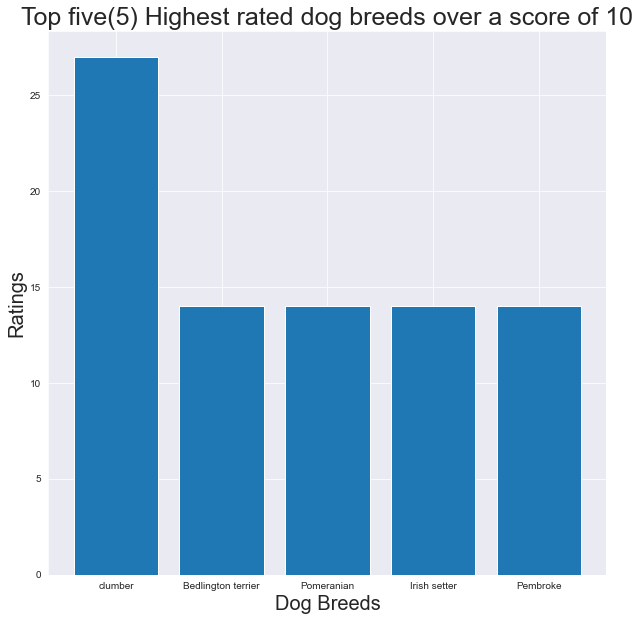

In [236]:
# plotting a bar graph to visualize the top five highest rated dog breeds
plt.subplots(figsize=(10, 10))
plt.bar(dog_ratings.index, dog_ratings)
plt.title('Top five(5) Highest rated dog breeds over a score of 10', fontsize = 25)
plt.xlabel('Dog Breeds',fontsize= 20)
plt.ylabel('Ratings',fontsize= 20);

##### The bar chart shows the top five highest rated dog breeds over a score of 10. It can be seen from the chart that the clumber is the highest rated breed. All other breeds as can be seen from the chart have the same ratings.

### Q2 : What are the common devices or applications used for tweeting ?

In [213]:
#Lets find out the value counts of the source of the tweets

tweet_source = df.source.value_counts()

tweet_source

Twitter for iPhone    147
TweetDeck               1
Name: source, dtype: int64

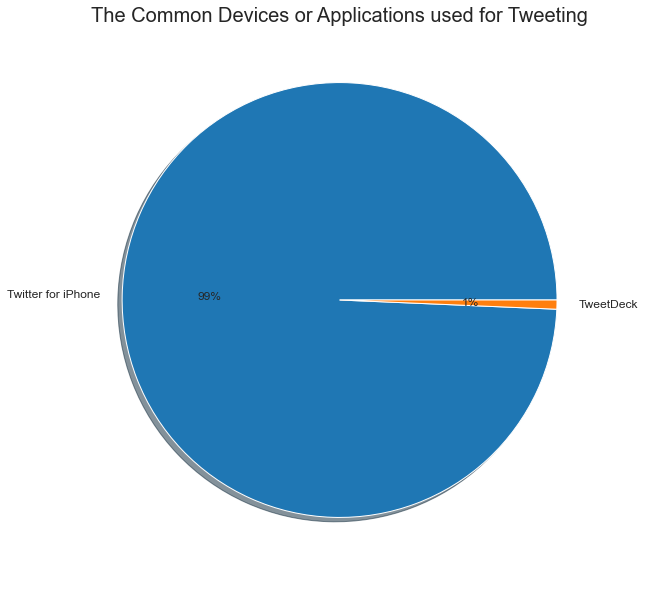

In [231]:
# Using a pie chart to visualize the common devices or applications used for tweeting
plt.figure(figsize=(10,10))
plt.title("The Common Devices or Applications used for Tweeting",fontsize=20)
tweet_source.plot(kind='pie',fontsize=12, autopct='%1.0f%%',shadow = True)
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12);


###### The pie chart reveals that the source for about 99% of the tweets came from an Iphone device. Only % 1 of the tweets came from the Twitter Deck  application.

### What are the top 10 most common breed of dogs ?

In [215]:
#Lets take a look the dog breed names
df.dog_breed

0               Pembroke
1       golden retriever
2       Blenheim spaniel
3                 beagle
4       golden retriever
             ...        
143             Cardigan
144    Italian greyhound
145     golden retriever
146             malamute
147                 chow
Name: dog_breed, Length: 148, dtype: object

In [216]:
common_breeds = df.groupby(["dog_breed"]).rating_numerator.count().sort_values(ascending = False).head(10)
common_breeds

dog_breed
golden retriever      16
pug                    9
Pomeranian             7
Pembroke               6
Labrador retriever     6
German shepherd        5
Chihuahua              5
Border collie          4
chow                   3
cocker spaniel         3
Name: rating_numerator, dtype: int64

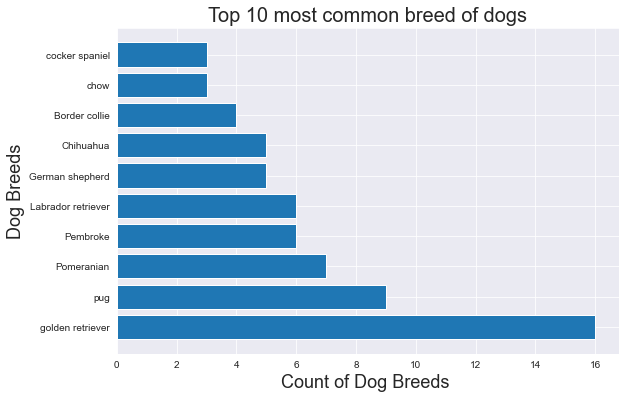

In [238]:
# plotting a bar graph to visualize the top 10 most common breed of dogs
plt.subplots(figsize=(9, 6))
plt.barh(common_breeds.index, common_breeds)
plt.title('Top 10 most common breed of dogs',size = 20)
plt.xlabel('Count of Dog Breeds ', fontsize = 18)
plt.ylabel('Dog Breeds',fontsize = 18 );

##### The bar chart shows that the most common breed of dogs are the golden retrievers with about 16 dogs belonging to that class of breeds, whilst cocker spaniel's are the least common breed of dogs with just 3 dogs belonging to that class of breeds. 

### Q4 : What are the  common dog names?

In [224]:
df.names.value_counts().sort_values()

Scooter     1
Rizzo       1
Sobe        1
Kyle        1
Kellogg     1
           ..
Gus         2
Milo        2
Loki        2
Chuckles    2
Cooper      3
Name: names, Length: 140, dtype: int64

In [218]:
#To generate a word cloud, we need store the names of the dogs in a list
text = list(df.names)  

#We then save the names in the list as a text, because to generate a word cloud we need to use natural text
with open('listfile.txt', 'w') as filehandle:
    for listitem in text:
        filehandle.write('%s\n' % listitem)

In [219]:
#lets open and read our new text file into a variable called text1
text1 = open('listfile.txt').read()

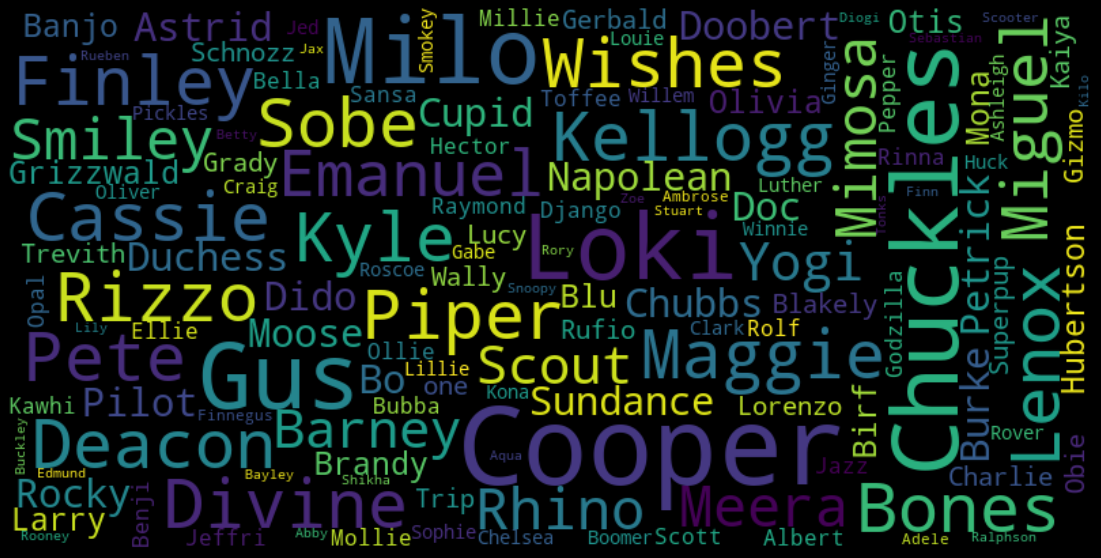

In [228]:
# Now lets create our word cloud using the text file that we have created, which contain the names of the dogs:
wordcloud = WordCloud(max_font_size=80, max_words=200, background_color="black",width=800, height=400,contour_width=0.1,contour_color='green',stopwords=STOPWORDS).generate(text1)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

#### The word cloud is used to depict the frequency of the occurence of dog names. It can be clearly seen that the name Cooper is the most common dog name 